 EDA Analysis of K-dramas

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

data = pd.read_csv("kdrama_cleaned_dataset.csv")
print("Overview of the dataset")
print(data.info())




Overview of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1444 entries, 0 to 1443
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         1444 non-null   object 
 1   Actors        1444 non-null   object 
 2   Directors     1444 non-null   object 
 3   Genre         1444 non-null   object 
 4   IMDb_Rating   1444 non-null   float64
 5   Plot          1444 non-null   object 
 6   Poster_Image  1444 non-null   object 
 7   Link          1444 non-null   object 
dtypes: float64(1), object(7)
memory usage: 90.4+ KB
None


In [33]:
print("\nSample Data:")
data.head(3)


Sample Data:


,Title,Actors,Directors,Genre,IMDb_Rating,Plot,Poster_Image,Link
0,100 Days My Prince,"['Doh Kyung-soo', 'Nam Ji-hyun', 'Jo Sung-ha',...","['Lee Jong-jae', 'Nam Sung-woo']","['Historical', 'Romantic comedy']",7.8,"Upon losing his memory, a crown prince encount...",https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/100_Days_My_Prince
1,12 Signs of Love,"['Yoon Jin-seo', 'On Joo-wan']",['Oh Jong-rok'],['Romantic comedy'],5.6,A young man struggling for a good life meets a...,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/12_Signs_of_Love
2,12 Years Promise,"['Lee So-yeon', 'Namkoong Min', 'Lee Tae-im', ...","['Kim Do-hyung', 'Yoon Jae-won']","['Romantic comedy', 'Family']",7.2,A pregnant teen is forced by her family to lea...,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/12_Years_Promise


In [28]:

#Checking for missing values 
print("\nMissing Values")
print(data.isnull().sum())

#There are no missing values 


#Checking Data Distribution of Rating

print("\nDataset Statistics:")
print(data.describe(include='float')) #Considering only float since its a numeric data type


Missing Values
Title           0
Actors          0
Directors       0
Genre           0
IMDb_Rating     0
Plot            0
Poster_Image    0
Link            0
dtype: int64

Dataset Statistics:
       IMDb_Rating
count  1444.000000
mean      7.256302
std       0.802712
min       2.300000
25%       6.900000
50%       7.300000
75%       7.800000
max       9.100000


In [20]:
#Top 10 dramas based on rating 

top_10 = data[['Title','IMDb_Rating']].sort_values(by='IMDb_Rating',ascending=False).head(10)

top_10

,Title,IMDb_Rating
1082,Stained Glass (TV series),9.1
808,My Mister,9.0
961,Reply 1988,9.0
960,Reply (TV series),9.0
751,Mother (South Korean TV series),9.0
903,Persona (TV series),9.0
638,Love in the Big City (TV series),9.0
784,My First Time (TV series),8.9
1308,Three Friends (TV series),8.9
776,My Dearest,8.9


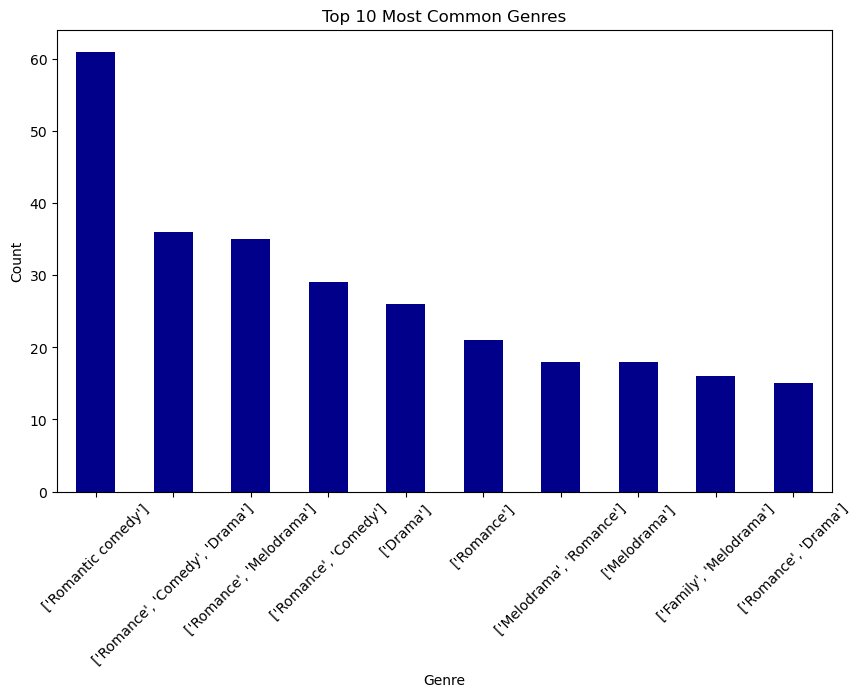

In [8]:
#Genre Frequency 

plt.figure(figsize=(10,6))
data['Genre'].value_counts().head(10).plot(kind='bar', color='darkblue')
plt.title("Top 10 Most Common Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

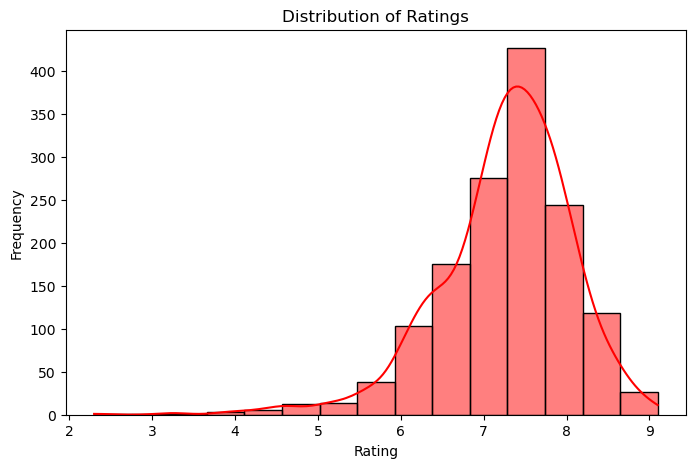

In [9]:
#Distribution of ratings 

plt.figure(figsize=(8,5))
sns.histplot(data['IMDb_Rating'],kde=True,bins=15,color='red')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

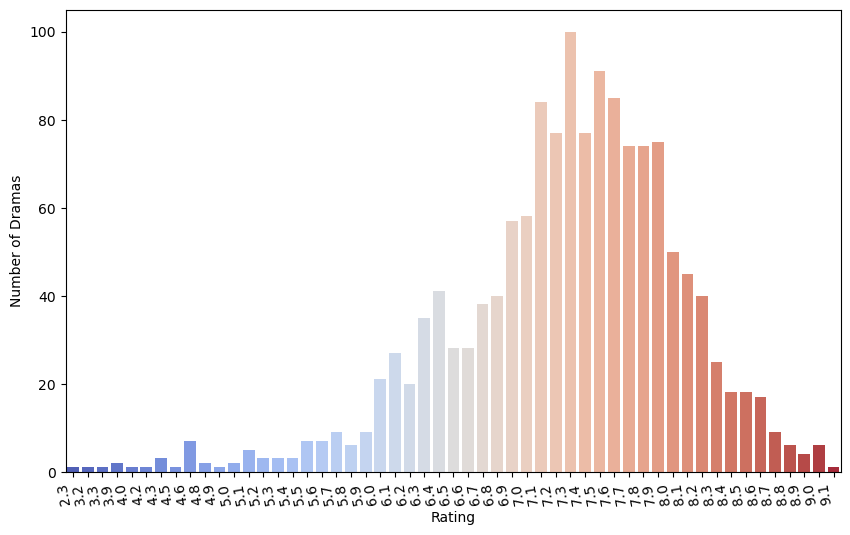

In [26]:
#Getting Count of Dramas based on Rating
rating_counts = data['IMDb_Rating'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='coolwarm')
plt.xlabel('Rating')
plt.ylabel('Number of Dramas')
plt.xticks(rotation=100, ha='right')
plt.show()


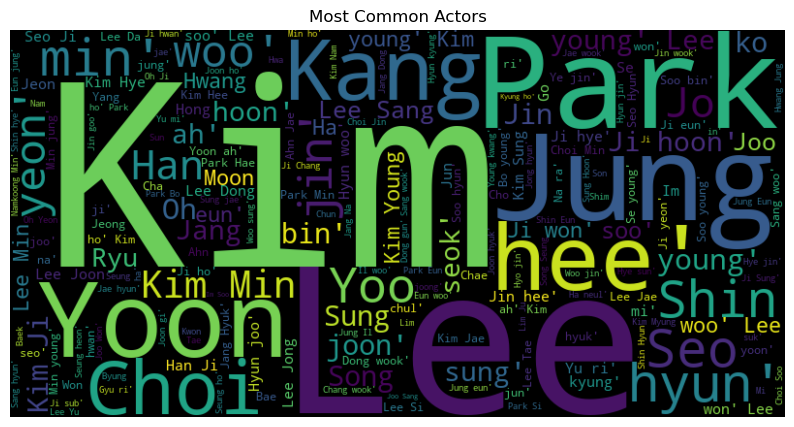

In [14]:
#Mosgt common words in Actors 
#!pip install wordcloud
from wordcloud import WordCloud

actors_list = ' '.join(data['Actors'].dropna())
wordcloud = WordCloud(width=800,height=400,background_color='black').generate(actors_list)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Actors')
plt.show()

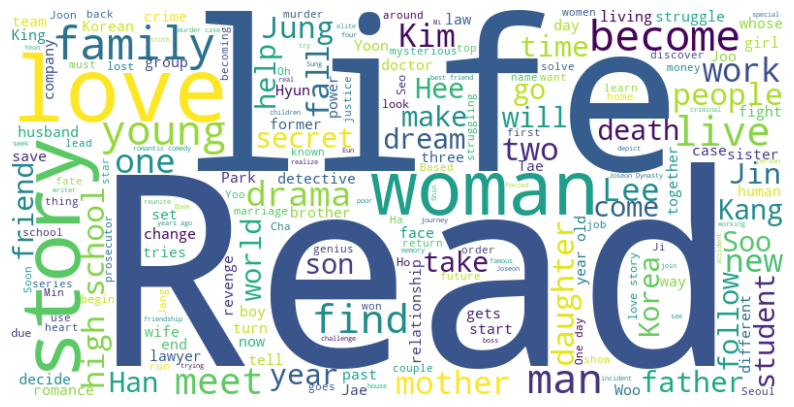

In [19]:
# WordCloud for Plot
text = ' '.join(data['Plot'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()